In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
# (note: we overwrite the previous data here, make sure to reload it if you go back to part 1)
Xall, tall = datasets.load_digits(return_X_y=True)

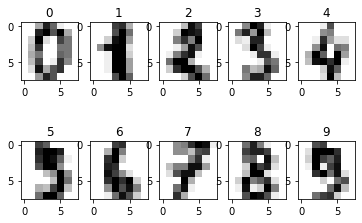

In [2]:
for j in range(10):
    plt.subplot(2,5,j+1)
    plt.imshow(np.reshape(Xall[j,:], (8,8)), cmap=plt.cm.gray_r)
    plt.title("%d" % tall[j])
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(Xall,tall,test_size = 0.1,random_state=20)

1338
9


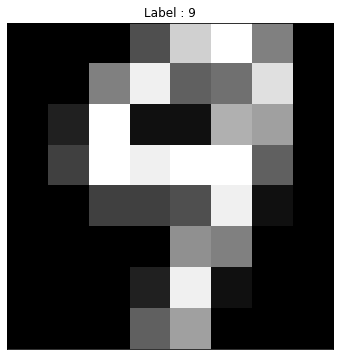

In [4]:
idx = np.random.randint(X_train.shape[0])
print(idx)

img = X_train[idx].reshape(8,8)
print(y_train[idx])

plt.figure(figsize = (6,6))
plt.imshow(img,'gray')
plt.title("Label : {}".format(y_train[idx]))
plt.xticks([])
plt.yticks([])
plt.show()



In [13]:
n_input = 64

# Encoder structure
n_encoder1 = 128
n_encoder2 = 64

# Decoder structure
n_decoder2 = 64
n_decoder1 = 128

# Define your latent space size
n_latent = 32

In [14]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

In [15]:
reg = MLPRegressor(hidden_layer_sizes = (n_encoder1, n_encoder2, n_latent, n_decoder2, n_decoder1), 
                   activation = 'tanh', 
                   alpha = 0.0001,
                   shuffle = True,
                   random_state = 58,
                   solver = 'adam', 
                   learning_rate_init = 0.0001,
                   learning_rate='adaptive',
                   max_iter = 60000, 
                   tol = 0.0000001, 
                   n_iter_no_change=40000,
                   verbose = False)

In [16]:
%%time
reg.fit(X_train, X_train)

CPU times: user 8h 42min 48s, sys: 1d 1h 7min 41s, total: 1d 9h 50min 29s
Wall time: 42min 28s


/opt/omniai/software/Miniconda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=(128, 64, 32, 64, 128),
             learning_rate='adaptive', learning_rate_init=0.0001,
             max_iter=60000, n_iter_no_change=40000, random_state=58,
             tol=1e-07)

<Axes: >

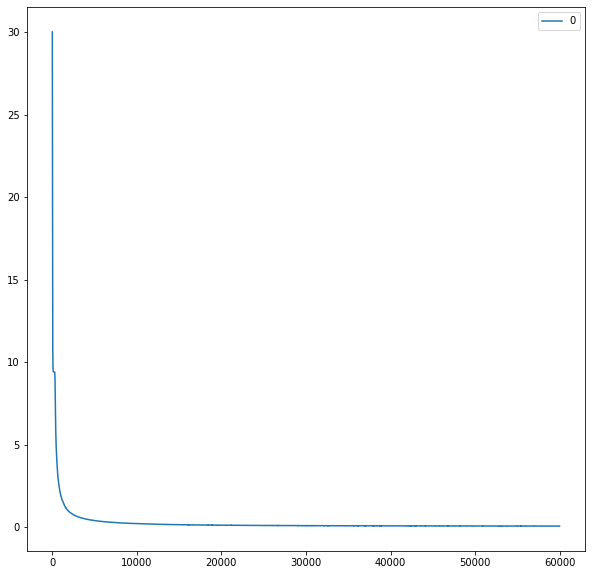

In [17]:
pd.DataFrame(reg.loss_curve_).plot(figsize=(10, 10))

In [18]:
def calculate_reconstruction_loss(data, model):
    print(data.shape)
    reconstructions = model.predict(data)
    print(reconstructions.shape)
    reconstruction_errors = np.mean(np.abs(data - reconstructions), axis=0)
    print(reconstruction_errors.shape)
    return reconstruction_errors

In [19]:
reconstruction_loss_normal = calculate_reconstruction_loss(X_test, reg)
print(np.mean(reconstruction_loss_normal))

(180, 64)
(180, 64)
(64,)
0.5262830080195559


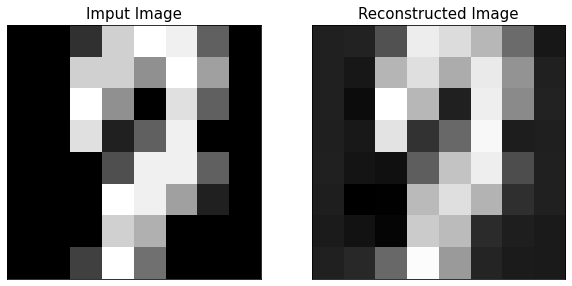

In [12]:
idx = np.random.randint(X_test.shape[0])

x_reconst = reg.predict(X_test[idx].reshape(-1,64))

plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.imshow(X_test[idx].reshape(8,8), 'gray')
plt.title('Imput Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(x_reconst.reshape(8,8), 'gray')
plt.title('Reconstructed Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()

In [123]:
def encoder(data):
    data = np.asmatrix(data)
    
    encoder1 = data*reg.coefs_[0] + reg.intercepts_[0]
    encoder1 = (np.exp(encoder1) - np.exp(-encoder1))/(np.exp(encoder1) + np.exp(-encoder1))
    
    encoder2 = encoder1*reg.coefs_[1] + reg.intercepts_[1]
    encoder2 = (np.exp(encoder2) - np.exp(-encoder2))/(np.exp(encoder2) + np.exp(-encoder2))
    
    latent = encoder2*reg.coefs_[2] + reg.intercepts_[2]
    latent = (np.exp(latent) - np.exp(-latent))/(np.exp(latent) + np.exp(-latent))
    
    return np.asarray(latent)

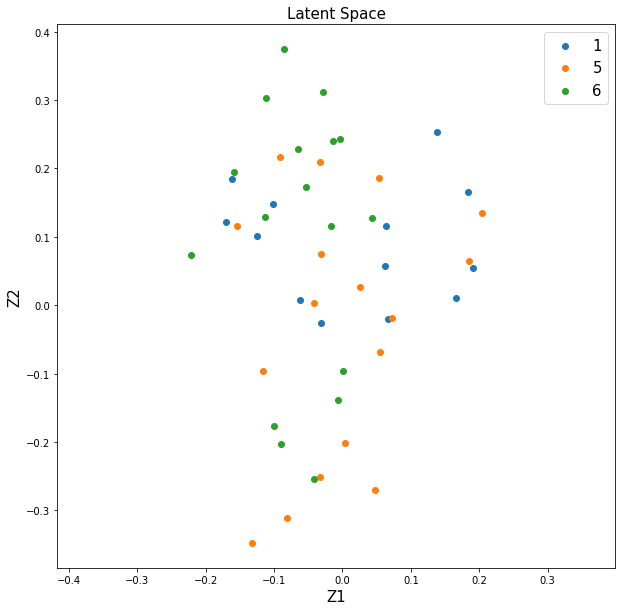

In [124]:
test_latent = encoder(X_test)

plt.figure(figsize = (10,10))
plt.scatter(test_latent[y_test == 1,0], test_latent[y_test == 1,1], label = '1')
plt.scatter(test_latent[y_test == 5,0], test_latent[y_test == 5,1], label = '5')
plt.scatter(test_latent[y_test == 6,0], test_latent[y_test == 6,1], label = '6')
plt.title('Latent Space', fontsize=15)
plt.xlabel('Z1', fontsize=15)
plt.ylabel('Z2', fontsize=15)
plt.legend(fontsize = 15)
plt.axis('equal')
plt.show()

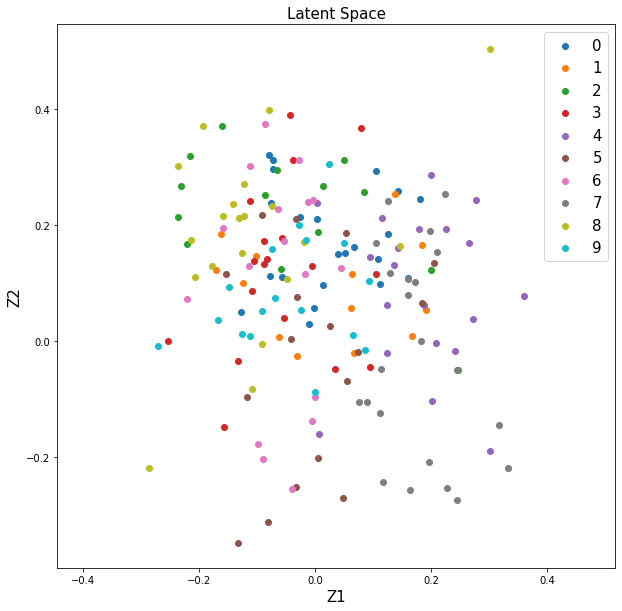

In [125]:
# Your code here
def encoder_latent(data):
    data = np.asmatrix(data)
    
    encoder1 = data*reg.coefs_[0] + reg.intercepts_[0]
    encoder1 = (np.exp(encoder1) - np.exp(-encoder1))/(np.exp(encoder1) + np.exp(-encoder1))
    
    encoder2 = encoder1*reg.coefs_[1] + reg.intercepts_[1]
    encoder2 = (np.exp(encoder2) - np.exp(-encoder2))/(np.exp(encoder2) + np.exp(-encoder2))
    
    latent = encoder2*reg.coefs_[2] + reg.intercepts_[2]
    latent = (np.exp(latent) - np.exp(-latent))/(np.exp(latent) + np.exp(-latent))
    
    return np.asarray(latent)

test_latent = encoder_latent(X_test)
#print(test_latent)
plt.figure(figsize = (10,10))
plt.scatter(test_latent[y_test == 0,0], test_latent[y_test == 0,1], label = '0')
plt.scatter(test_latent[y_test == 1,0], test_latent[y_test == 1,1], label = '1')
plt.scatter(test_latent[y_test == 2,0], test_latent[y_test == 2,1], label = '2')
plt.scatter(test_latent[y_test == 3,0], test_latent[y_test == 3,1], label = '3')
plt.scatter(test_latent[y_test == 4,0], test_latent[y_test == 4,1], label = '4')
plt.scatter(test_latent[y_test == 5,0], test_latent[y_test == 5,1], label = '5')
plt.scatter(test_latent[y_test == 6,0], test_latent[y_test == 6,1], label = '6')
plt.scatter(test_latent[y_test == 7,0], test_latent[y_test == 7,1], label = '7')
plt.scatter(test_latent[y_test == 8,0], test_latent[y_test == 8,1], label = '8')
plt.scatter(test_latent[y_test == 9,0], test_latent[y_test == 9,1], label = '9')
plt.title('Latent Space', fontsize=15)
plt.xlabel('Z1', fontsize=15)
plt.ylabel('Z2', fontsize=15)
plt.legend(fontsize = 15)
plt.axis('equal')
plt.show()